In [1]:
import delfi.distribution as dd
import delfi.generator as dg
import delfi.inference as infer
import delfi.summarystats as ds
import lfimodels.glm.utils as utils
import matplotlib.pyplot as plt
import numpy as np

from lfimodels.glm.GLM import GLM
from lfimodels.glm.GLMStats import GLMStats
from delfi.utils.viz import plot_pdf

%matplotlib inline

In [ ]:
m = GLM()
p = utils.smoothing_prior(n_params=m.n_params)
s = GLMStats(n_summary=m.n_params)
g = dg.Default(model=m, prior=p, summary=s)

true_params, labels_params = utils.obs_params()
obs = utils.obs_data(true_params)

In [ ]:
sam = utils.pg_mcmc(true_params, obs)

  1%|▏         | 6846/499999 [00:03<03:28, 2363.93it/s]

(<matplotlib.figure.Figure at 0x7f2b9617c2e8>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2b51b4e8d0>,
         <matplotlib.axes._subplots.AxesSubplot object at 0x7f2b1c06b7f0>]], dtype=object))

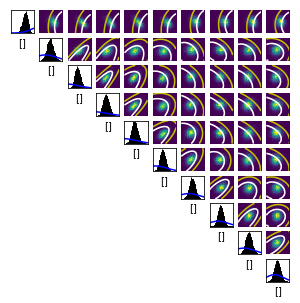

In [5]:
plot_pdf(p, lims=[-4,4], samples=sam)

In [3]:
seed = 42
res = infer.Basic(g, n_hiddens=[10], seed=seed, svi=True)

# run with N samples
out = res.run(1500)